<img src="images/GEMS Informatics Learning.png" width=600 alt="GEMS Learning Logo" title="GEMS Learning" />

# **Introduction to Spatial Data Analysis in R**

**Instructors:**  
Ali Joglekar (joglekar@umn.edu)  
Yuan Chai (chaix026@umn.edu)  

**Module Outline:**  
- [I/O Point Data & Basic Maps](#Point)  
  - [Exercise 2](#Ex2)
- [I/O Polygon Data & Basic Maps](#Polygon) 
  - [Exercise 3](#Ex3)
- [I/O Raster Data & Basic Maps](#Raster)  
  - [Exercise 4](#Ex4)
- [Layering Features in Maps](#Map)
  - [Exercise 5](#Ex5)

---

### Load R Libraries

In [1]:
# Install and load packages needed for this workshop

packages_to_load <- c("rio", "sf", "terra", "tmap")

for ( package in packages_to_load ) {
    # Check if package is already installed, if not, install and load the package
    if (!require(package, character.only=T, quietly=T, warn.conflicts=F)) {
        install.packages(package)
        suppressPackageStartupMessages(library(package, character.only=T, quietly=T, warn.conflicts=F))
    }
}

Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE

terra 1.5.21



<details>
    
<summary><span style='color:Green'> Note: For your own work, once packages are installed, it is recommended to just use library() to load your packages  </span></summary>


```
# General dataframe libraries
library(rio)

# Spatial data libraries
library(sf)
library(terra)

# Plotting libraries
library(tmap)
```
----
          
</details>


### Data

In this example, we will use three datasets from the Minnesota Geospatial Commons, which have been downloaded, cleaned, transformed and saved in the directory `./data/MN` for this workshop.
1. Minnesota Six-Inch Soil Temperature: https://gisdata.mn.gov/dataset/geos-soil-temp-network
2. Groundwater Provinces of Minnesota 2021: https://gisdata.mn.gov/dataset/geos-groundwater-provinces-mn
3. Cropland Data Layer 2020, Minnesota: https://gisdata.mn.gov/dataset/agri-cropland-data-layer-2020

<a id="Point"></a>
## **Working with Spatial Points Data in R**
### Importing XY data

Our first step is to read in the .csv file that contains our attribute data and geocordinates. For this example, we will be using the *Minnesota Six-Inch Soil Temperature* data. 

> The Minnesota Department of Agriculture (MDA) Six-Inch Soil Temperature Network provides real time soil temperatures at locations across Minnesota. The network was established to assist in following best management practices for fall nitrogen fertilizer application which refer to a soil temperature at a six-inch depth.

For today's workshop, a random October 5, 2021 temperature has been added for illustrative purposes. We read in .csv data using the `rio` package.

In [2]:
soil_samp <- import("./data/MN/soil_samp/soil_samp_2021-10-05.csv")
soil_samp

,source,x,y,name,temp_20211005
,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,MDA,-94.19423,44.20017,Judson,41.79259
2,MDA,-95.42888,44.76222,Granite Falls,49.42997
3,MDA,-93.26841,43.51400,Gordonsville,37.78381
4,MDA,-94.35897,44.87780,Hutchinson,60.24301
5,MDA,-96.30680,44.00319,Pipestone,58.48928
6,MDA,-96.43726,43.77682,Jasper,46.85971
7,MDA,-95.24493,44.23869,Lamberton,50.24598
8,MDA,-95.95298,44.32180,Russell,55.86885
9,MDA,-95.62489,45.31111,Benson,50.27298


### Converting to `sf` Object

After identifying the longitude (x) and latitude (y) coordinates, we convert the *xy* data to an `sf` object using `st_as_sf`.

In [3]:
#soil_samp <- st_as_sf(soil_samp, coords = c("x","y"))
soil_samp <- st_as_sf(soil_samp, coords = c("x","y"))
head(soil_samp)
st_crs(soil_samp) = 4326
st_crs(soil_samp)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,source,name,temp_20211005,geometry
,<chr>,<chr>,<dbl>,<POINT>
1,MDA,Judson,41.79259,POINT (-94.19423 44.20017)
2,MDA,Granite Falls,49.42997,POINT (-95.42888 44.76222)
3,MDA,Gordonsville,37.78381,POINT (-93.26841 43.514)
4,MDA,Hutchinson,60.24301,POINT (-94.35897 44.8778)
5,MDA,Pipestone,58.48928,POINT (-96.3068 44.00319)
6,MDA,Jasper,46.85971,POINT (-96.43726 43.77682)


Coordinate Reference System:
  User input: EPSG:4326 
  wkt:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["Horizon

We're setting the coordinate reference system (crs) to WGS84. This is represented by the European Petroleum Survey Group (EPSG) Code: 4326

### Summarizing Point Data

In [4]:
head(soil_samp) #print data (top 6 rows)

,source,name,temp_20211005,geometry
,<chr>,<chr>,<dbl>,<POINT [°]>
1,MDA,Judson,41.79259,POINT (-94.19423 44.20017)
2,MDA,Granite Falls,49.42997,POINT (-95.42888 44.76222)
3,MDA,Gordonsville,37.78381,POINT (-93.26841 43.514)
4,MDA,Hutchinson,60.24301,POINT (-94.35897 44.8778)
5,MDA,Pipestone,58.48928,POINT (-96.3068 44.00319)
6,MDA,Jasper,46.85971,POINT (-96.43726 43.77682)


In [5]:
st_bbox(soil_samp) #bounding box

     xmin      ymin      xmax      ymax 
-97.15028  43.51400 -91.80022  48.88353 

In [6]:
st_crs(soil_samp) #coordinate reference system

Coordinate Reference System:
  User input: EPSG:4326 
  wkt:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["Horizon

In [7]:
summary(soil_samp) #summary statistics

    source              name           temp_20211005            geometry 
 Length:65          Length:65          Min.   :35.18   POINT        :65  
 Class :character   Class :character   1st Qu.:42.90   epsg:4326    : 0  
 Mode  :character   Mode  :character   Median :49.43   +proj=long...: 0  
                                       Mean   :49.09                     
                                       3rd Qu.:54.89                     
                                       Max.   :62.64                     

### Simple Maps from Point Data

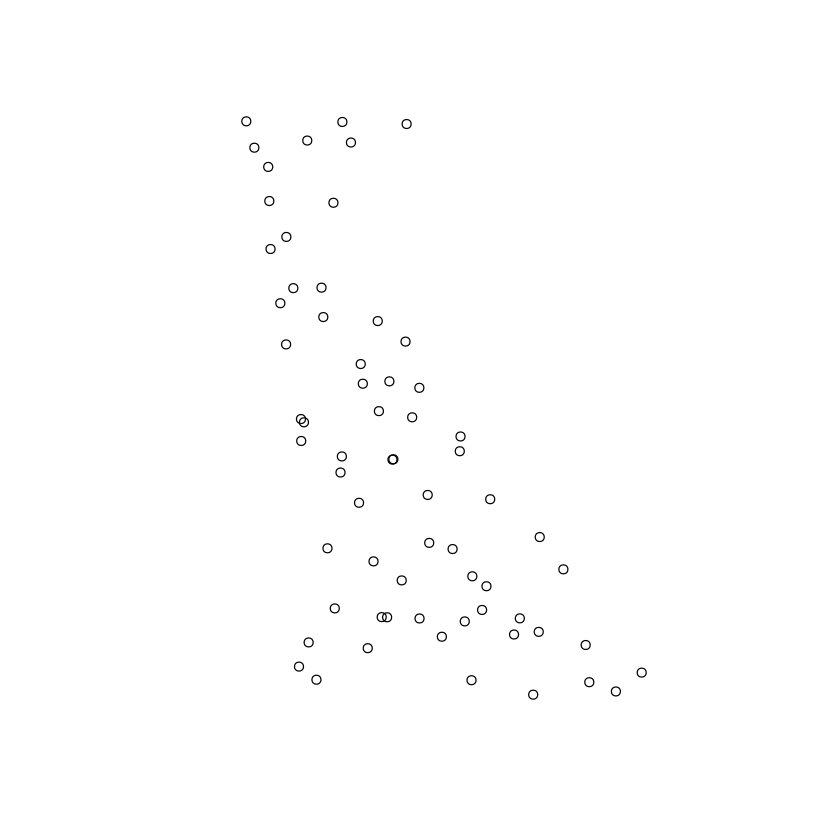

In [8]:
plot(st_geometry(soil_samp))  #plots geometry

#### plotting with ```base R```

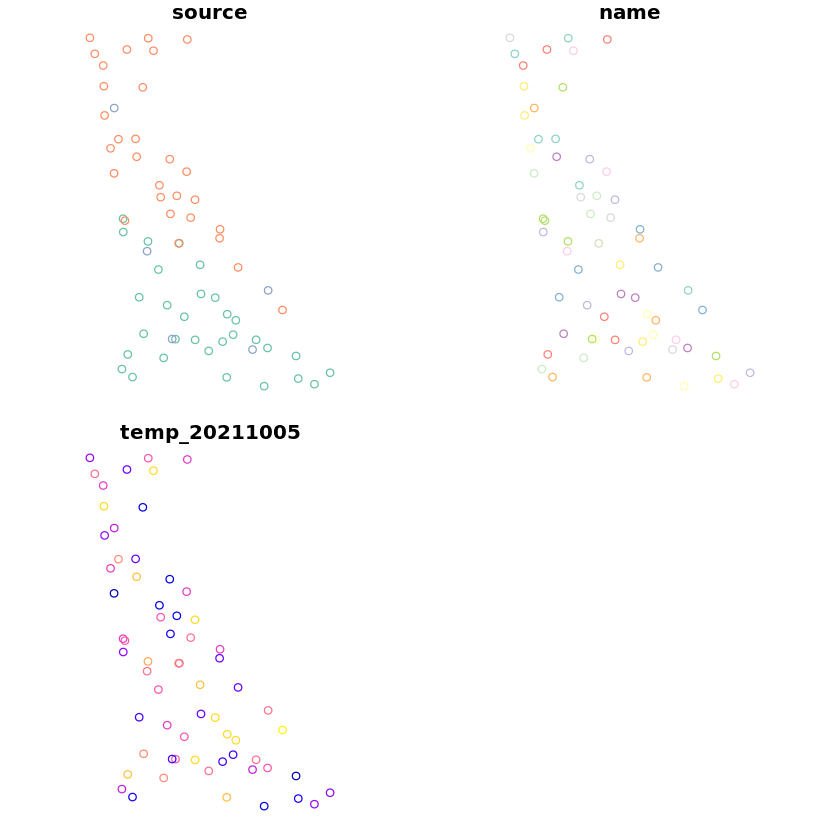

In [9]:
#plots multiple variables
plot(soil_samp)       

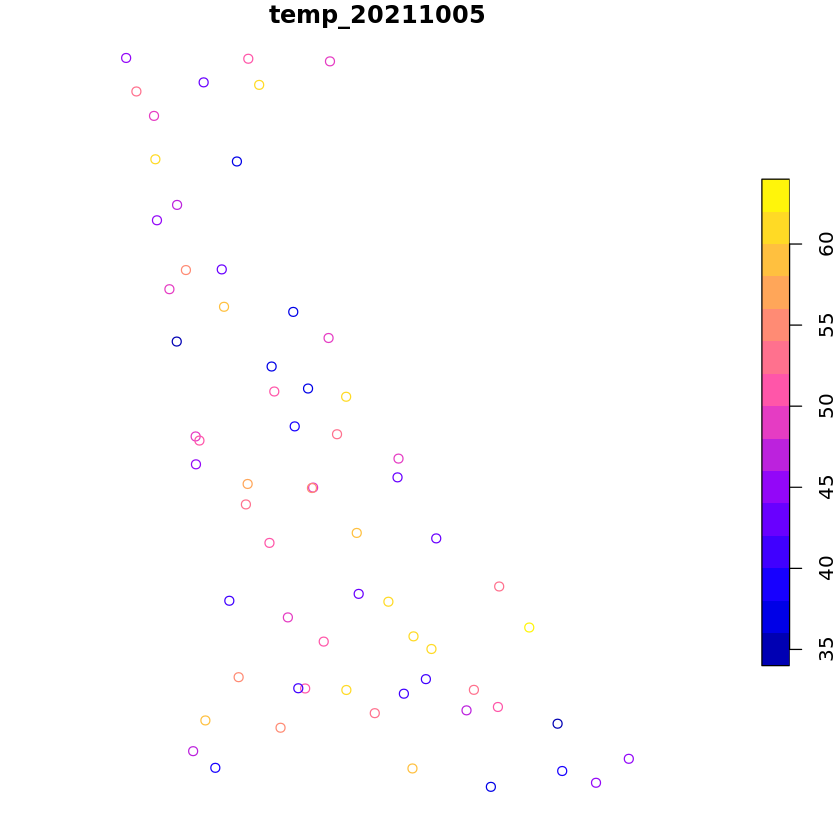

In [10]:
#plots single variable
plot(soil_samp["temp_20211005"])   

#### plotting with ```tmap```

tmap mode set to plotting



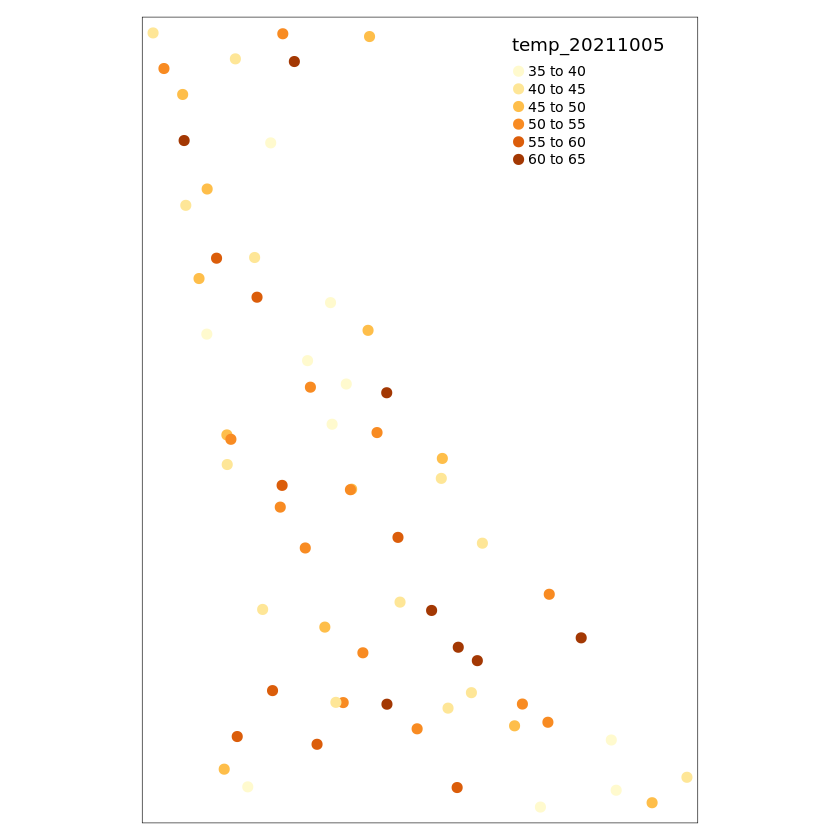

In [11]:
tmap_mode("plot")
tm_shape(soil_samp) +
  tm_dots("temp_20211005", size = 0.3)

Use the command `tmap_mode("view")` and `tmap_mode("plot")` to toggle between interactive viewing and static plotting.

### Export Points Data

```st_write(obj, "./path/.../filename.shp")```

<a id="Ex2"></a>
### **<span style='color:Green'> Exercise 2: Explore Malawi LSMS Wave 5 (Point) Data</span>**   

> *Data Source:*  
> Malawi Living Standard Measurement Survey Integrated Household Sample (LSMS-IHS) Data Wave 5 Data is available from https://microdata.worldbank.org/index.php/catalog/3818  

For today's workshop, the data has been downloaded, cleaned, transformed, and saved in the directory `./data/MWI`.

1. Read-in the enumeration area geo-coordinates `ea_geo.csv` file.

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

Use `import()` from the `rio` package to read in `ea_geo.csv`:

```
ea_geo <- import("./data/MWI/ea_geo.csv")
```
----
          
</details>

2. Identify the coordinate variables. 

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

The coodinate variables are

* x: `ea_lon_mod`
* y: `ea_lat_mod`

----
          
</details>

3. Convert data.frame object into an `sf` POINT object (assume a WGS84 CRS) and explore the data.

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```
ea_geo <- st_as_sf(ea_geo, coords = c("ea_lon_mod","ea_lat_mod"), crs = 4326)

ea_geo
st_crs(ea_geo)
st_bbox(ea_geo)
summary(ea_geo)
```

----
          
</details>

4. Create some maps
    1. Plot a map of the geometry of the points in base R.
    2. Plot a map of all of variables in base R.
    3. Plot a map of the `dist_road` variable in base R.
    4. Plot a map of the `dist_road` variable in tmap.

In [12]:
tmap_mode("plot")
tm_shape(ea_geo) +
  tm_dots("dist_road", size = 0.3)

tmap mode set to plotting



ERROR: Error in as.list.environment(environment()): object 'ea_geo' not found


<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```
# Geometry in base R
plot(st_geometry(ea_geo))

# Multiple variables in base R 
plot(ea_geo)

# dist_road in base R
plot(ea_geo["dist_road"])

#dist_road` in tmap 
tm_shape(ea_geo) +
  tm_dots("dist_road", size = 0.3)
```

----
          
</details>

<a id="Polygon"></a>
## **Working with Polygon Data in R**
### Importing Shapefiles

Our first step is to read in the .shp file that contains our attribute data and geometry data. For this example, we will be using the *Groundwater Provinces of Minnesota 2021* data. 

> The Minnesota Groundwater Provinces map summarizes aquifer and groundwater resource differences at the regional level. Some parts of the state have several groundwater resources to choose from, while other parts of the state may have only limited groundwater resources available.

For today's workshop, 3 random variables have been added as fields for illustrative purposes. We read in vector data using the `sf` package.

In [ ]:
gw_prov <- st_read("./data/MN/gw_prov") #shapefiles called only using data source name (dsn)

### Summarizing Polygon Data

In [ ]:
head(gw_prov) #print data (top 6 rows)

In [ ]:
st_bbox(gw_prov) #bounding box

In [ ]:
st_crs(gw_prov) #coordinate reference system

In [ ]:
summary(gw_prov) #summary statistics

### Simple Choropleth Maps from Polygon Data

In [ ]:
plot(st_geometry(gw_prov))  #plots geometry

#### plotting with ```base R```

In [ ]:
#plots multiple variables
plot(gw_prov)      

In [ ]:
#plots single variable
plot(gw_prov["var3"])

#### plotting with ```tmap```

In [ ]:
tm_shape(gw_prov) + 
  tm_borders("red") +
  tm_fill(col = "var3") +
  tm_layout(legend.outside = TRUE)  #several more options available to clean up legend

### Export Polygon Data

```st_write(obj, "./path/.../filename.shp")```

<a id="Ex3"></a>
### **<span style='color:Green'> Exercise 3: Explore Malawi LSMS Wave 5 (Polygon) Data</span>**   

> *Data Source:*  
> Malawi Living Standard Measurement Survey Integrated Household Sample (LSMS-IHS) Data Wave 5 Data is available from https://microdata.worldbank.org/index.php/catalog/3818  
> The Shapefile can be downloaded from https://data.humdata.org/dataset/malawi-administrative-level-0-3-boundaries

For today's workshop, the data has been downloaded, cleaned, transformed, and saved in the directory `./data/MWI`.

1. Read-in the `mwi_lsms` shapefile located in the `./data/MWI` folder.

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

Use `st_read()` to read in the MWI shapefile:

```
mwi_lsms <- st_read("./data/MWI")
```
----
          
</details>

2. Explore the characteristics of your shapefile. 
    1. How many features does it have?
    2. How many fields does it have?
    3. Calculate the summary statistics of the field data.

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

Using both the print function `mwi_lsms` we see that there are 32 features and 18 fields.  

Summary statistics can be calculated using `summary(mwi_lsms)`.
    
----
          
</details>

3. Create some choropleth maps
    1. Plot a map of the outline of Malawi districts (ADM2 units) in base R.
    2. Plot a map of all of first 18 variables in base R.
    3. Plot a map of the `poverty` variable in base R.
    4. Plot a map of the `poverty` variable in tmap.

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```
# Geometry in base R
plot(st_geometry(mwi_lsms))

# Multiple variables in base R 
plot(mwi_lsms, max.plot = 18)

# dist_road in base R
plot(mwi_lsms["poverty"])

#dist_road` in tmap 
tm_shape(mwi_lsms) + 
  tm_polygons(col = "poverty")
```

----
          
</details>

<a id="Raster"></a>
## **Working with Raster Data in R**
### Importing Raster Files

Our first step is to read in the raster file that contains our data. For this example, we will be using the *Cropland Data Layer 2020, Minnesota* data. 

> The United States Department of Agriculture (USDA), National Agricultural Statistics Service (NASS) Cropland Data Layer (CDL) is a raster, geo-referenced, crop-specific land cover data layer.

For today's workshop, the data has been transformed to represent 3 categories: non-cropland (0), corn (1), and other cropland (2). We read in raster data using the `terra` package.

In [ ]:
cdl <- rast("./data/MN/cdl_2020/cdl3_3km.tif") 
cdl

### Summarizing Raster Data

In [ ]:
nrow(cdl) #number of rows

In [ ]:
ncol(cdl) #number of columns
ncell(cdl)

In [ ]:
res(cdl) #resolution

In [ ]:
ext(cdl) #bounding box

In [ ]:
crs(cdl) #coordinate reference system

In [ ]:
hist(cdl) #histogram of values

### Simple Maps from Raster Data

#### plotting with ```base R```

In [ ]:
plot(cdl)    

#### plotting with ```tmap```

In [ ]:
tm_shape(cdl) + 
  tm_raster() +
  tm_layout(legend.outside = TRUE)

### Export Raster Data

```writeRaster(obj, "./path/.../filename.tif", overwrite=TRUE)```

I recommend you write out your raster objects as GeoTiff files

<a id="Ex4"></a>
### **<span style='color:Green'> Exercise 4: Explore Malawi LSMS Wave 5 (Raster) Data</span>**   

> *Data Source:*  
> The data were aggregated from SRTM 90 m resolution data between -60 and 60 latitude. 

The data will be downloaded directly using the `raster::getData()` function in R

1. Using the command `mwi_dem <- raster::getData('alt', country='MWI', mask=TRUE, path = "./data/MWI")`, download the digital elevation model (dem) data for Malawi. 

2. Convert file to a `terra::SpatRaster` object using the `rast()` command. [You can ignore the warnings.]

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```
mwi_dem <- rast(mwi_dem)
```
----
          
</details>

3. Set coordinate reference system using the command `crs(mwi_dem) <- "epsg:4326"`

4. Explore the characteristics of your raster. 
    1. How many rows and columns does it have?
    2. What is the resolution?
    3. What is the coordinate reference system?
    4. What is the distribution of values?

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

By printing your raster object `mwi_dem` or using `nrow(mwi_dem)`, `ncol(mwi_dem)`, `res(mwi_dem)`, and `crs(mwi_dem)` you can see that 
    
* There are 948 rows and 408 columns
* The cell resolution is 0.008333333 degrees, which is also referred to as 30 arc-seconds (approximately 1km at the equator)
* The coordinate reference system is lon/lat WGS 84 (EPSG:4326)
* The distribution of elevation ranges from 32 meters to 2,748 meters above sea level
   
The distribution of elevation can also be seen using a histogram
```
hist(mwi_dem)
```

----
          
</details>

5. Create some maps
    1. Plot a map of elevation in base R.
    2. Plot a map of elevation in tmap.

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```
# elevation in base R
plot(mwi_dem)

# elevation in tmap 
tm_shape(mwi_dem) + 
  tm_raster() +
  tm_layout(legend.outside = TRUE)
```

----
          
</details>

<a id="Map"></a>
## **Layering Features**

Now that you know how to import and map vector and raster data you can start layering muliple objects on top of one another in your maps. 

In [ ]:
tm_shape(cdl) + tm_raster(title = "Land Class", palette = "Set2") +
  tm_shape(gw_prov) + tm_borders() + 
  tm_shape(soil_samp) + tm_bubbles("temp_20211005", size = 0.2, palette = "Greys") +
  tm_layout(legend.outside = TRUE)

### Picking Colors
I recommend using the Color Brewer website to pick color palettes for your maps: https://colorbrewer2.org/

### Export tmap Images

```tmap_save(obj, "./path/.../filename.png", height = 4, width = 6, unit = "in")```

<a id="Ex5"></a>
### **<span style='color:Green'> Exercise 5: Maps with Multiple Features</span>**   

1. Create a `tmap` object with three features
    1. Malawi DEM (raster)
    2. Malawi district boundaries borders (polygon)
    3. Malawi LSMS surveyed enumeration areas (point)

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```
tm_shape(mwi_dem) + tm_raster() +
  tm_shape(mwi_lsms) + tm_borders() + 
  tm_shape(ea_geo) + tm_dots(size = 0.2) +
  tm_layout(legend.outside = TRUE)
```
----
          
</details>